In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import warnings
from sklearn.ensemble import GradientBoostingRegressor
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
warnings.filterwarnings("ignore")

 EDA

In [2]:
df=pd.read_csv("full_data.csv")
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [3]:
df.head().T

,0,1,2,3,4
gender,Male,Male,Female,Female,Male
age,67.0,80.0,49.0,79.0,81.0
hypertension,0,0,0,1,0
heart_disease,1,1,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Private,Private,Self-employed,Private
Residence_type,Urban,Rural,Urban,Rural,Urban
avg_glucose_level,228.69,105.92,171.23,174.12,186.21
bmi,36.6,32.5,34.4,24.0,29.0
smoking_status,formerly smoked,never smoked,smokes,never smoked,formerly smoked


In [4]:
df.shape

(4981, 11)

In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

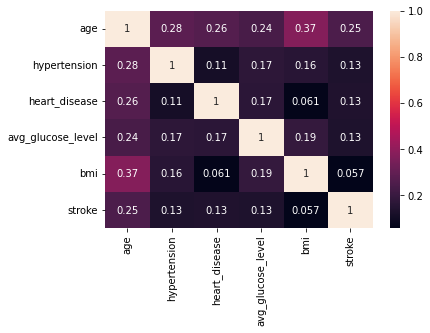

In [7]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [8]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
gender = df.groupby(df['gender'])['stroke'].sum()
df_gender = pd.DataFrame({'labels': gender.index,
                   'values': gender.values
                  })
colors = ['tomato', 'lightskyblue']
df_gender.iplot(kind='pie',labels='labels',values='values', title='The Proportion of Stroke among Gender', colors = colors)

In [10]:
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [11]:
hypertension = df.groupby(df['hypertension'])['stroke'].sum()
df_gender = pd.DataFrame({'labels': hypertension.index,
                   'values': hypertension.values
                  })
colors = ['tomato', 'lightskyblue']
df_gender.iplot(kind='bar',labels='labels',values='values', title='The Proportion of Stroke of those having hypertension', colors = colors)

In [12]:
df["heart_disease"].unique()

array([1, 0], dtype=int64)

In [13]:
hypertension = df.groupby(df['heart_disease'])['stroke'].sum()
df_gender = pd.DataFrame({'labels': hypertension.index,
                   'values': hypertension.values
                  })
colors = ['tomato', 'lightskyblue']
df_gender.iplot(kind='bar',labels='labels',values='values', title='The Proportion of Stroke of those having hypertension', colors = colors)

In [14]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

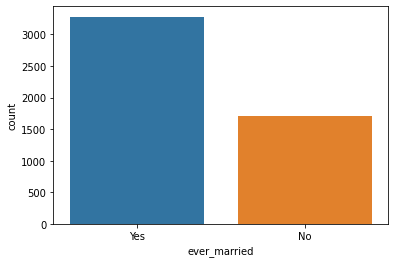

In [15]:
ax = sns.countplot(x='ever_married',data=df)

In [16]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

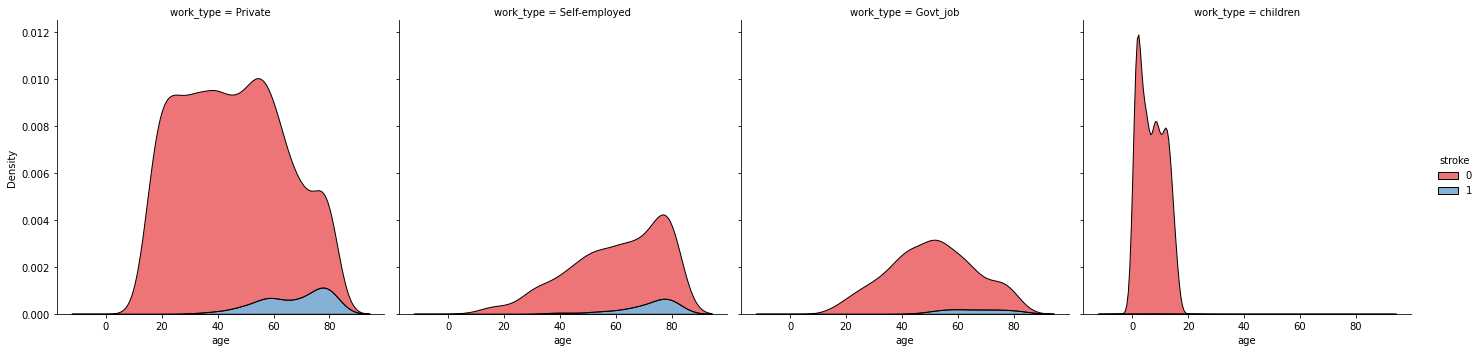

In [17]:
sns.displot( df,x = 'age', hue = 'stroke',col = 'work_type',  multiple="stack", palette = 'Set1', kind = 'kde',alpha = 0.6, col_wrap = 4)

In [18]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

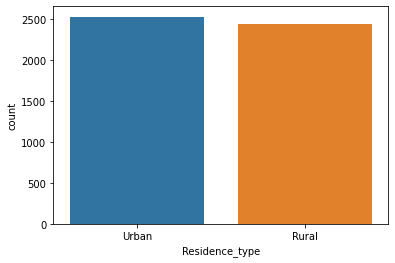

In [19]:
ax = sns.countplot(x='Residence_type',data=df)

In [20]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

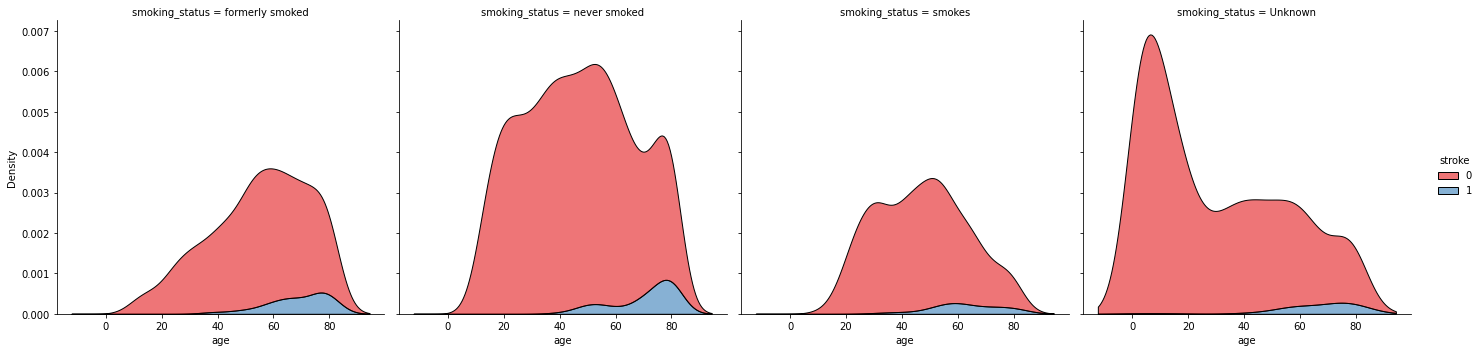

In [21]:
sns.displot( df,x = 'age', hue = 'stroke',col = 'smoking_status', kind = 'kde',
            multiple="stack", palette = 'Set1', alpha = 0.6, col_wrap = 4)

In [22]:
df["stroke"].unique()

array([1, 0], dtype=int64)

In [23]:
df["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

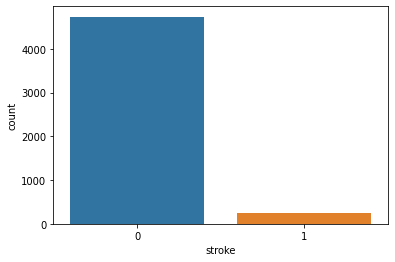

In [24]:
ax = sns.countplot(x='stroke',data=df)

MODEL BUILLDING

In [25]:
df=pd.get_dummies(df, columns = ["work_type", "gender","Residence_type","smoking_status","ever_married"],sparse=True)

In [26]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
1,80.0,0,1,105.92,32.5,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1
2,49.0,0,0,171.23,34.4,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1
3,79.0,1,0,174.12,24.0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
4,81.0,0,0,186.21,29.0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1


In [27]:
x=df.drop(['stroke'],axis=1)
y=df['stroke']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(3984, 19)

In [29]:
X_test.shape

(997, 19)

In [30]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model_1.predict(X_test)

In [32]:
(accuracy_score(y_pred, y_test))*100

94.58375125376128

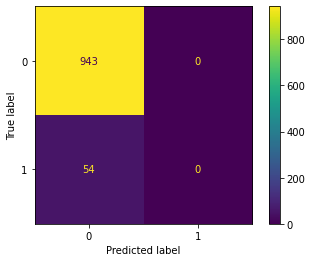

In [33]:
plot_confusion_matrix(model_1, X_test, y_test)  
plt.show()

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



In [35]:
smote = SMOTEENN()
X_re,y_re = smote.fit_resample(x,y)

<AxesSubplot:xlabel='stroke', ylabel='count'>

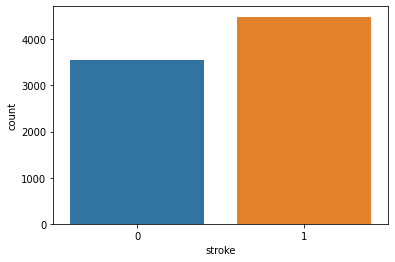

In [36]:
sns.countplot(x=y_re)

In [37]:
Counter(y_re)

Counter({0: 3545, 1: 4492})

In [38]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_re)

In [39]:
X_train, X_test ,y_train , y_test = train_test_split(X_train_scale,y_re,test_size=0.3)

In [40]:
y_train.shape

(5625,)

In [41]:
model_1.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred = model_1.predict(X_test)

In [43]:
accuracy_score(y_pred,y_test)

0.9618573797678275

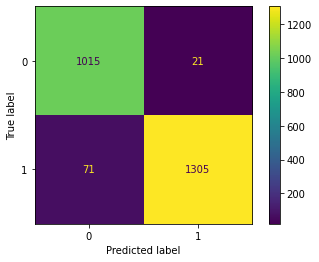

In [44]:
plot_confusion_matrix(model_1, X_test, y_test)  
plt.show()

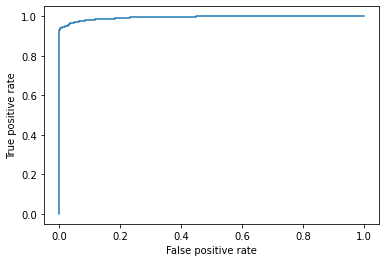

In [45]:
prob_predict = model_1.predict_proba(X_test)[::,1]

fpr , tpr ,_ = roc_curve(y_test,prob_predict)

#creating the roc curve
plt.plot(fpr , tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [46]:
model_2 = svm.SVC()
model_2.probability = True
model_2.fit(X_train,y_train)

#finding out the predicted results
prediction = model_2.predict(X_test)
#finding out the classification matrix
print(accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

0.9614427860696517
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1036
           1       0.99      0.94      0.97      1376

    accuracy                           0.96      2412
   macro avg       0.96      0.96      0.96      2412
weighted avg       0.96      0.96      0.96      2412



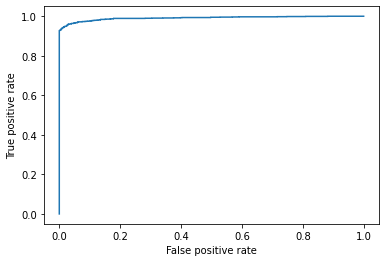

In [47]:
prob_predict = model_2.predict_proba(X_test)[::,1]

fpr , tpr ,_ = roc_curve(y_test,prob_predict)

#creating the roc curve
plt.plot(fpr , tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

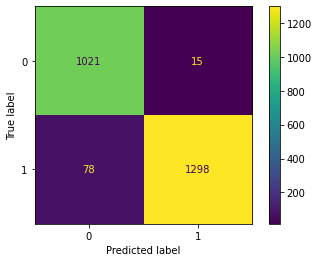

In [48]:
plot_confusion_matrix(model_2, X_test, y_test)  
plt.show()

In [49]:
model_3 = DecisionTreeClassifier(criterion='gini', random_state=0)
model_3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
y_pred = model_3.predict(X_test)

In [51]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

0.947346600331675
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1036
           1       0.95      0.96      0.95      1376

    accuracy                           0.95      2412
   macro avg       0.95      0.95      0.95      2412
weighted avg       0.95      0.95      0.95      2412



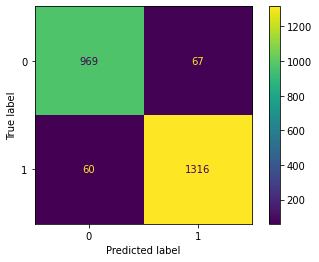

In [52]:
plot_confusion_matrix(model_3, X_test, y_test)  
plt.show()

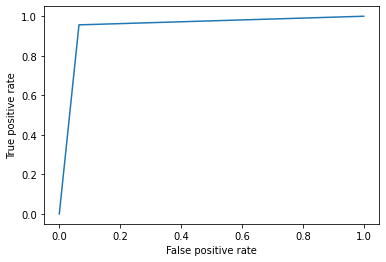

In [53]:
prob_predict = model_3.predict_proba(X_test)[::,1]

fpr , tpr ,_ = roc_curve(y_test,prob_predict)

#creating the roc curve
plt.plot(fpr , tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [54]:
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('svc', model_2), ('dec', model_3)], voting='soft')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
y_pred = final_model.predict(X_test)

In [55]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

0.9684908789386402
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1036
           1       0.98      0.96      0.97      1376

    accuracy                           0.97      2412
   macro avg       0.97      0.97      0.97      2412
weighted avg       0.97      0.97      0.97      2412



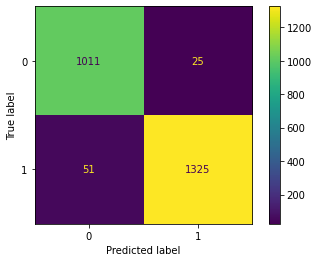

In [56]:
plot_confusion_matrix(final_model, X_test, y_test)  
plt.show()

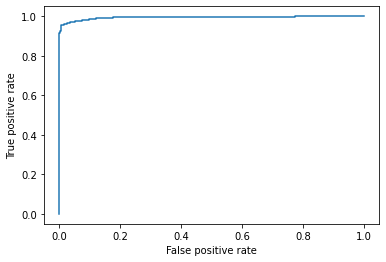

In [57]:
prob_predict = final_model.predict_proba(X_test)[::,1]

fpr , tpr ,_ = roc_curve(y_test,prob_predict)

#creating the roc curve
plt.plot(fpr , tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()